# 多层感知机的简洁实现
:label:`sec_mlp_concise`

本节将介绍(**通过高级API更简洁地实现多层感知机**)。


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 模型

与softmax回归的简洁实现（ :numref:`sec_softmax_concise`）相比，
唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是[**隐藏层**]，它(**包含256个隐藏单元，并使用了ReLU激活函数**)。
第二层是输出层。


In [2]:
net = nn.Sequential(nn.Flatten(), # 将彼此数据展平成二维
                    nn.Linear(784, 256), # 隐藏层，也是全连接层
                    nn.ReLU(), # 激活函数，引入非线性
                    # nn.Tanh(), # 双曲正切，结果在-1到1之间
                    # nn.Sigmoid(), # 结果在0到1之间
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10)) # 输出层，也是第二个全连接层

# normal正态分布初始化
def init_weights(m):
    if type(m) is nn.Linear:
        nn.init.normal_(m.weight, std=0.01) # 初始化w，另外的参数b则默认为0

# # Kaiming权重初始化
# def init_weights(m):
#     if type(m) is nn.Linear:
#         # Kaiming (He) 正态分布初始化
#         # 'relu' 明确了激活函数类型，这很重要
#         nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
#         # 偏置通常初始化为0
#         if m.bias is not None:
#              nn.init.constant_(m.bias, 0)

net.apply(init_weights); # 将参数应用到net的每个子模块

[**训练过程**]的实现与我们实现softmax回归时完全相同，
这种模块化设计使我们能够将与模型架构有关的内容独立出来。


In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
# 交叉熵损失，reduction='none'表示返回该批次的损失向量，若reduction='mean'则返回该批次损失的平均值
# CrossEntropyLoss的参数为(inputs,targets)，其中inputs也就是y_hat形状[batch_size, num_outputs]代表原始输出logits
# targets也就是y形状[batch_size]代表类别索引
loss = nn.CrossEntropyLoss(reduction='none') # 
trainer = torch.optim.SGD(net.parameters(), lr=lr)

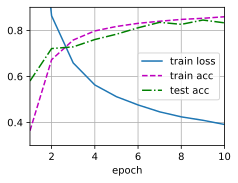

In [4]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
# print('lr:', lr)

## 小结

* 我们可以使用高级API更简洁地实现多层感知机。
* 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现里增加了带有激活函数的隐藏层。

## 练习

1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
   
    - lr=0.1的结果如下

        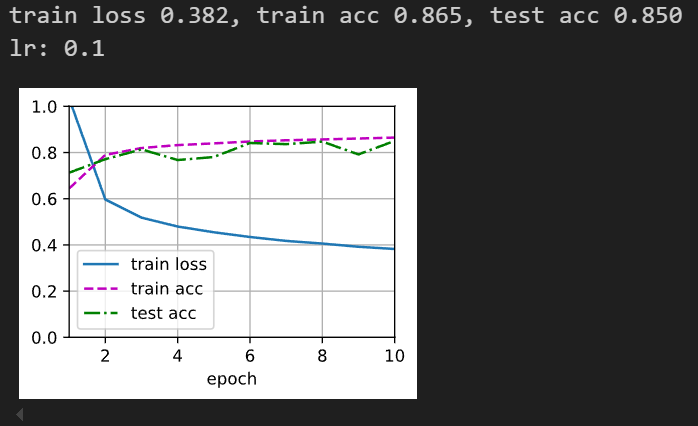

    - lr=0.5的结果如下

        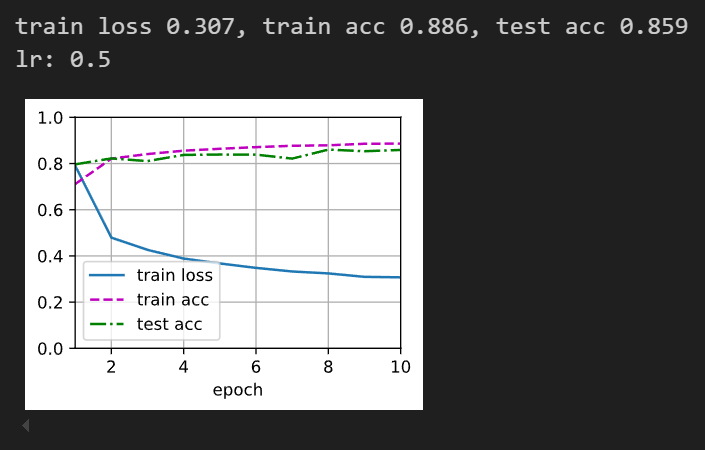

    - lr=0.1的结果如下

        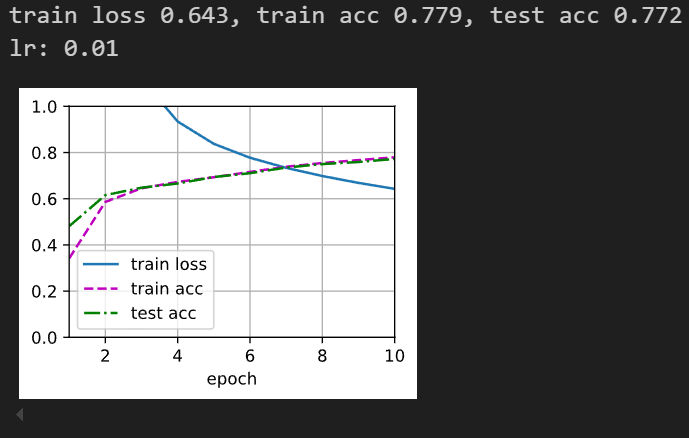

    根据实验，lr=0.5的结果最好
2. 尝试不同的激活函数，哪个效果最好？

    * nn.relu函数结果如下

        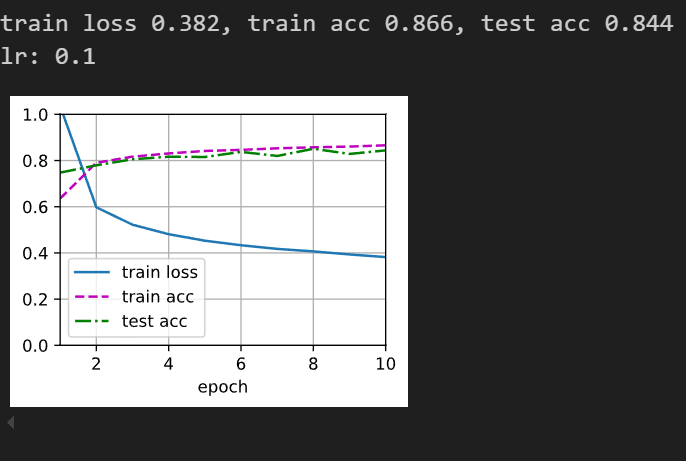

    * nn.tanh函数结果如下

        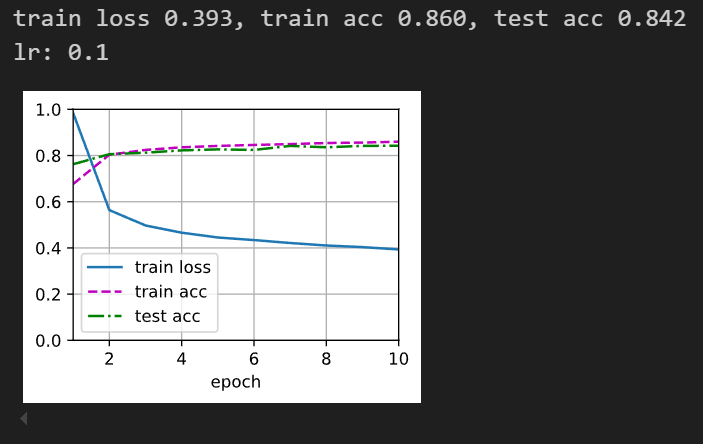
    
    * nn.sigmod函数结果如下

        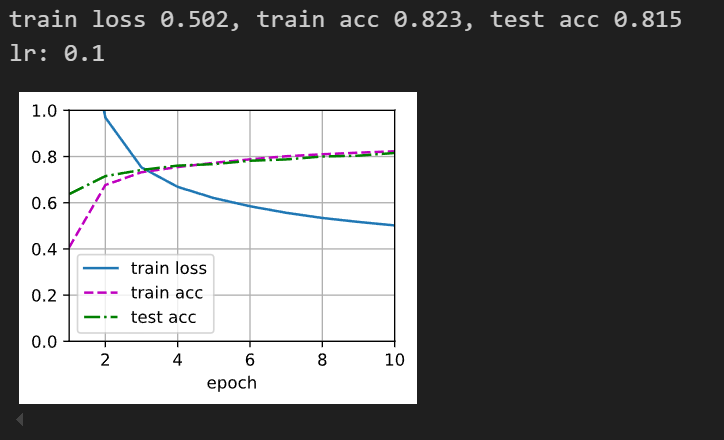

    可以看到rule结果最好，tanh结果相近，sigmod结果较差
        
3. 尝试不同的方案来初始化权重，什么方法效果最好？
   * 使用正态分布初始化权重，结果如下
   
        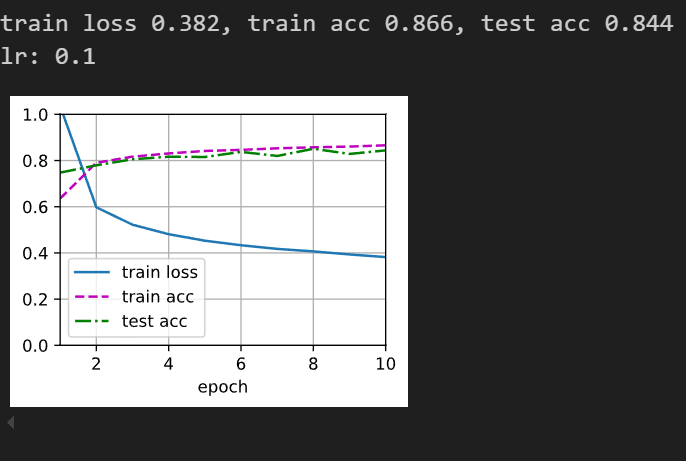

   * 使用kaiming初始化权重，结果如下
   
        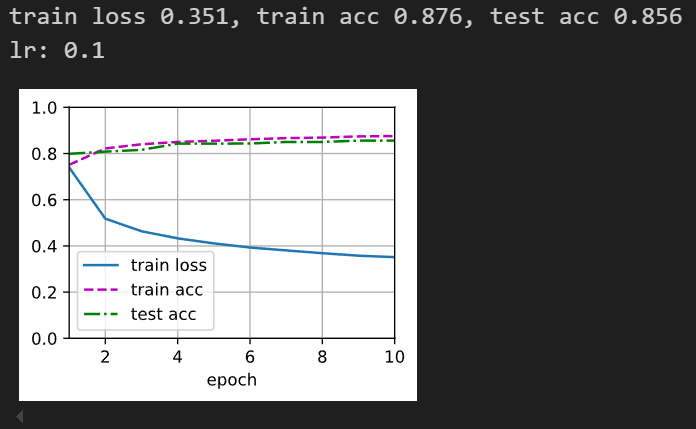

    根据实验，kaiming效果相比normal更好。kaiming根据输入的数量调整权重的方差，有效防止梯度爆炸或消失


[Discussions](https://discuss.d2l.ai/t/1802)
